## Meet my data 

In [28]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of Iris DataSet:\n\t{}".format(iris_dataset.keys()))

Keys of Iris DataSet:
	dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [29]:
print("\nDescription of Iris Dataset:\n\n{}".format(iris_dataset['DESCR'][:1180]))


Description of Iris Dataset:

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mi

In [27]:
print("Target Names:\n\t{}".format(iris_dataset['target_names']))

Target Names:
	['setosa' 'versicolor' 'virginica']


In [30]:
print("Feature Names:\n\t{}".format(iris_dataset['feature_names']))

Feature Names:
	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [43]:
print("Shape of data:\t{}".format(iris_dataset['data'].shape))

Shape of data:	(150, 4)


In [35]:
print("First 5 rows of data:\n\n{}".format(iris_dataset['data'][:5]))

First 5 rows of data:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [41]:
print("Length of target:\t{}".format(len(iris_dataset['target'])))

Length of target:	150


In [150]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Measuring Success: Training and Testing Data

In [149]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(iris_dataset['data'], iris_dataset['target'], random_state = 0)

print("Training data set shape: {}".format(X_train.shape))
print("Training target shape: {}".format(y_train.shape))

print("\nTesting data set shape: {}".format(X_test.shape))
print("Testing target shape: {}".format(y_test.shape))

Training data set shape: (112, 4)
Training target shape: (112,)

Testing data set shape: (38, 4)
Testing target shape: (38,)


## Look at my data 

In [151]:
df_column_names = iris_dataset.feature_names
if 'species' not in df_column_names:
    df_column_names.append('species')
print("Dataframe column names:\n{}".format(df_column_names))

Dataframe column names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [147]:
import pandas as pd
import numpy as np

X_y_train = np.concatenate((X_train,y_train[:,np.newaxis]),axis=1)
iris_df = pd.DataFrame(X_y_train, columns = df_column_names)

iris_df["species"] = iris_df["species"].map({0.: "setosa", 1.0: "versicolor", 2.0: "verginica"})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.9,3.0,4.2,1.5,versicolor
1,5.8,2.6,4.0,1.2,versicolor
2,6.8,3.0,5.5,2.1,verginica
3,4.7,3.2,1.3,0.2,setosa
4,6.9,3.1,5.1,2.3,verginica


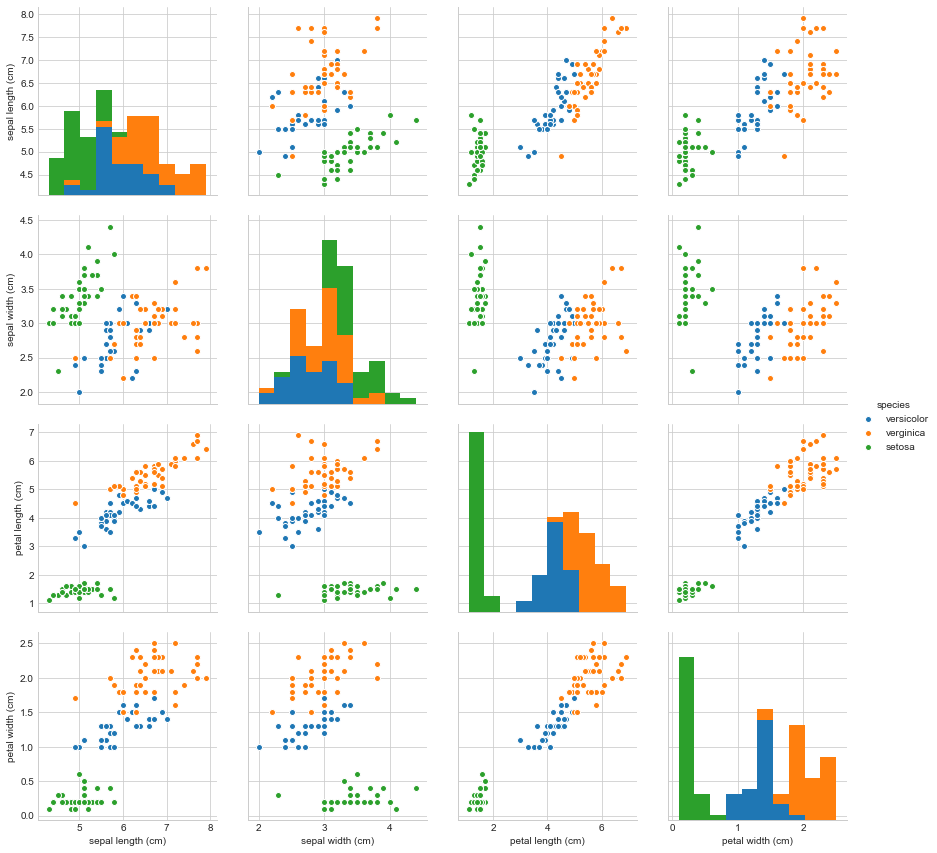

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(iris_df, hue = "species", size = 3);
plt.show()

## Building my Model: k-Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Making Predictions 

In [144]:
test_sample = X_test[:1]
prediction = knn.predict(test_sample)
print("Test Sample:\t{}".format(test_sample[0]))
print("Prediction:\t{}".format(prediction[0]))
print("Predicted Target Name:\t{}".format(iris_dataset['target_names'][prediction][0]))
print("Actual Target Name:\t{}".format(iris_dataset['target_names'][y_test[0]]))

Test Sample:	[5.8 2.8 5.1 2.4]
Prediction:	2
Predicted Target Name:	virginica
Actual Target Name:	virginica


## Evaluating the model 

In [153]:
y_pred = knn.predict(X_test)
print("Test set prediction:\n\n{}".format(y_pred))
print("\nTesting Target:\n\n{}".format(y_test))
print("\nTesting Data for which prediction failed:\n\n{}".format(X_test[y_pred != y_test][0]))

Test set prediction:

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

Testing Target:

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]

Testing Data for which prediction failed:

[6.  2.7 5.1 1.6]


In [78]:
print("Test set score:\t{:.2f}".format(np.mean(y_pred == y_test)))

Test set score:	0.97


In [79]:
print("Test set score:\t{:.2f}".format(knn.score(X_test, y_test)))

Test set score:	0.97


## Conclusion

For this model, the test accuracy is about 0.97, which means we made right prediction for 97% of iris flowers in the test set. This high level of accuracy means that our model may be trustworthy enough to use for our hobby botanist application.